# Analysis continuous data

- ## Basic statistics
        - center        
                - mean
                        : effected by extreme value
                - trimmed mean
                        : except extreme value (both side: left and right) and calculate mean
                        : less effected by extreme value
                - median
                        : middle point
                        : less effected by extreme value
        - spread
                - variance(unit sqaure)
                - standard deviation(real unit)
                        : effected by extreme value
                - interquartile range(IQR)
                        Q1 = 25%(Bottom 25%)
                        Q2 = 50%
                        Q3 = 75%(Top 25%)
                        : less effected by extreme value
        - correlation coefficient(Pearson)
                : Indicates the strength and direction of a linear relationship between two variables
                : -1<r<1 (no unit)
                : not indicates casuality !!!
        - visualization(histogram, boxplot, scatterplot) with matplotlib and seaborn !

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [4]:
# see basic statistics

tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.total_bill.mean()

19.78594262295082

In [6]:
# trimmed mean
from scipy import stats
stats.trim_mean(tips.total_bill, 0.1)

18.733214285714286

In [7]:
# IQR
tips.total_bill.quantile(0.75) - tips.total_bill.quantile(0.25)

10.779999999999998

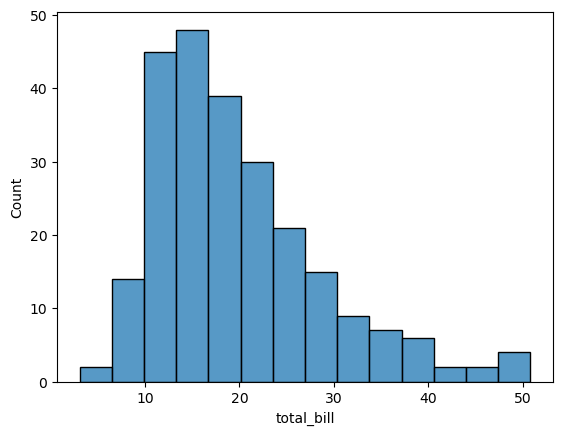

In [8]:
# histogram
sns.histplot(tips.total_bill)
plt.show()

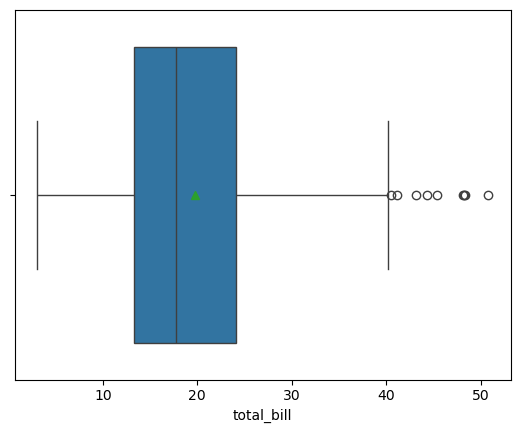

In [10]:
sns.boxplot(data=tips, x="total_bill", showmeans=True)
plt.show()

In [12]:
# Find outlier !  

tips_tb = tips.describe()

Q1 = tips_tb.loc['25%', 'total_bill']
Q3 = tips_tb.loc['75%', 'total_bill']
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("lower : ", lower)
print("upper : ", upper)

lower :  -2.8224999999999945
upper :  40.29749999999999


In [15]:
tf = tips.total_bill.between(lower,upper) # True -> no outlier (in normal range) / False -> outlier
any(~tf)

True

In [16]:
sum(~tf) # numbers of outlier

9

In [17]:
# print outlier
tips.total_bill[~tf] 

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

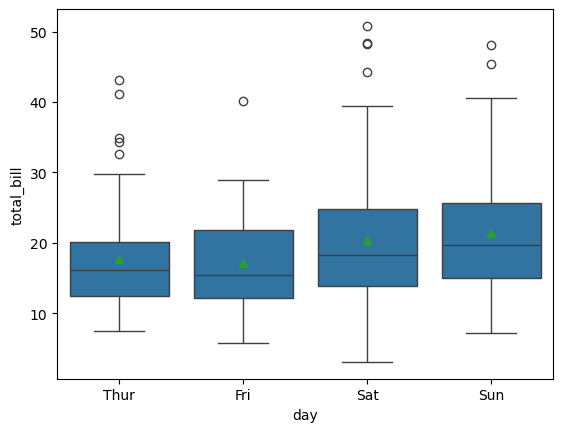

In [18]:
# boxplot per group
sns.boxplot(data=tips, x='day', y='total_bill', showmeans=True)
plt.show()

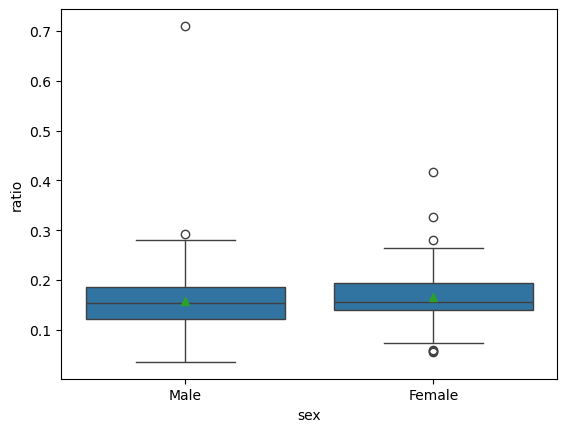

In [19]:
tips['ratio'] = tips.tip / tips.total_bill
sns.boxplot(data=tips, x='sex', y='ratio', showmeans=True)
plt.show()

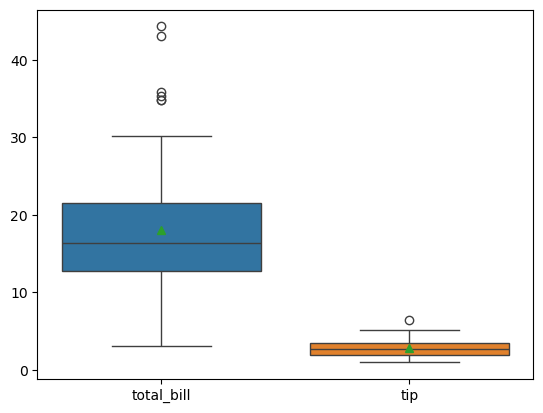

In [20]:
# Extra (2 variables)
f = tips.loc[tips.sex == "Female", ['total_bill', 'tip']]
sns.boxplot(data=f, showmeans=True)
plt.show()

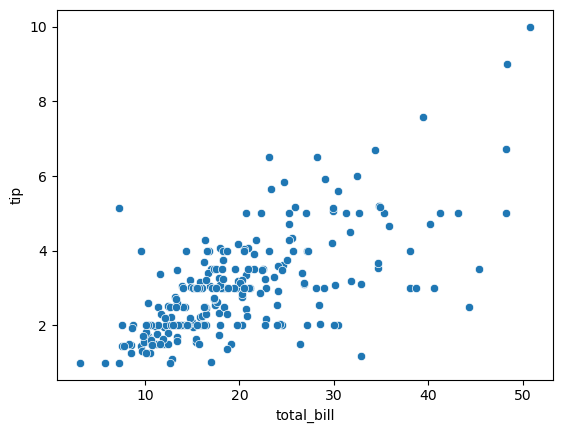

In [21]:
# scatterplot : relationship of two variable
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

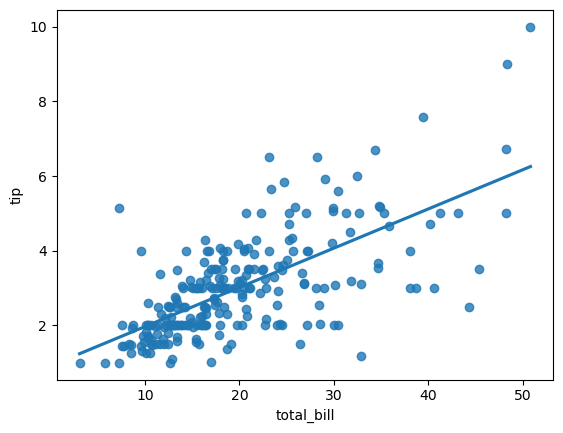

In [22]:
# scatterplot + line (regplot)
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.show()

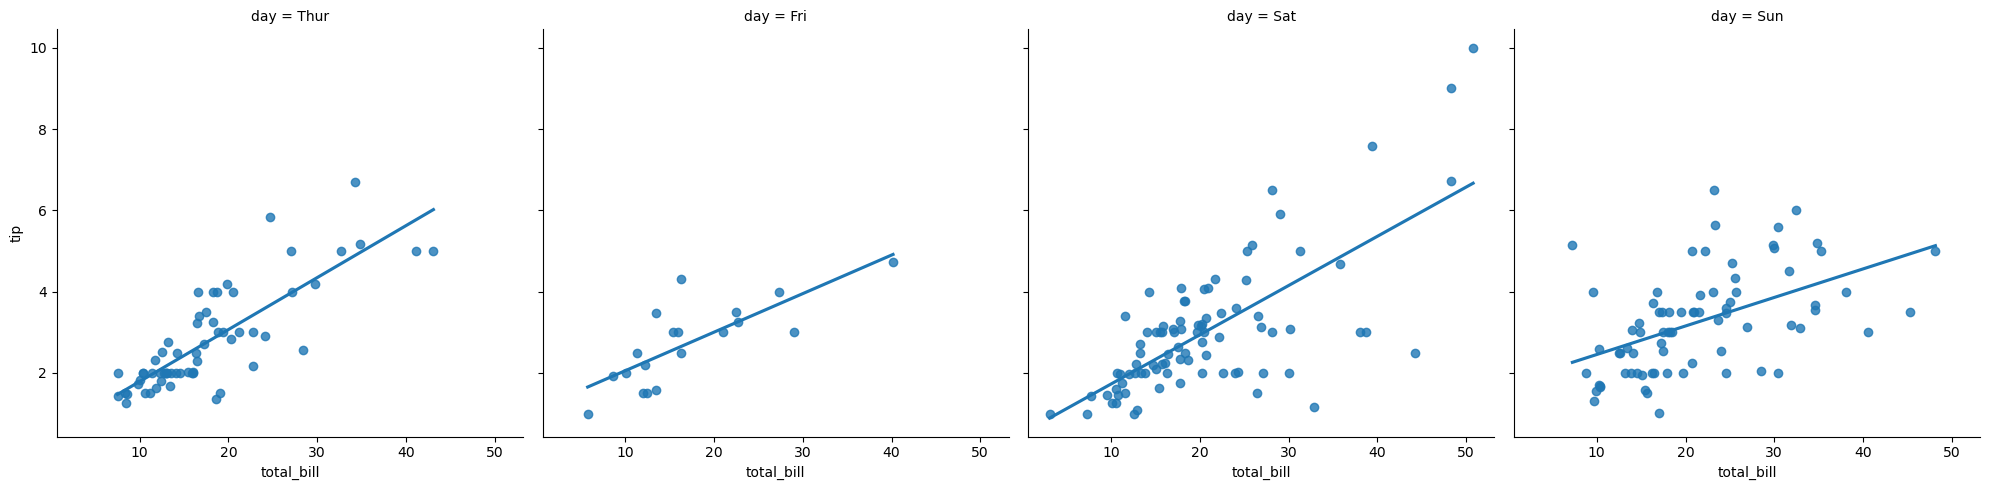

In [23]:
# per columns 
sns.lmplot(data=tips, x='total_bill', y='tip', col="day", ci = None)
plt.show()

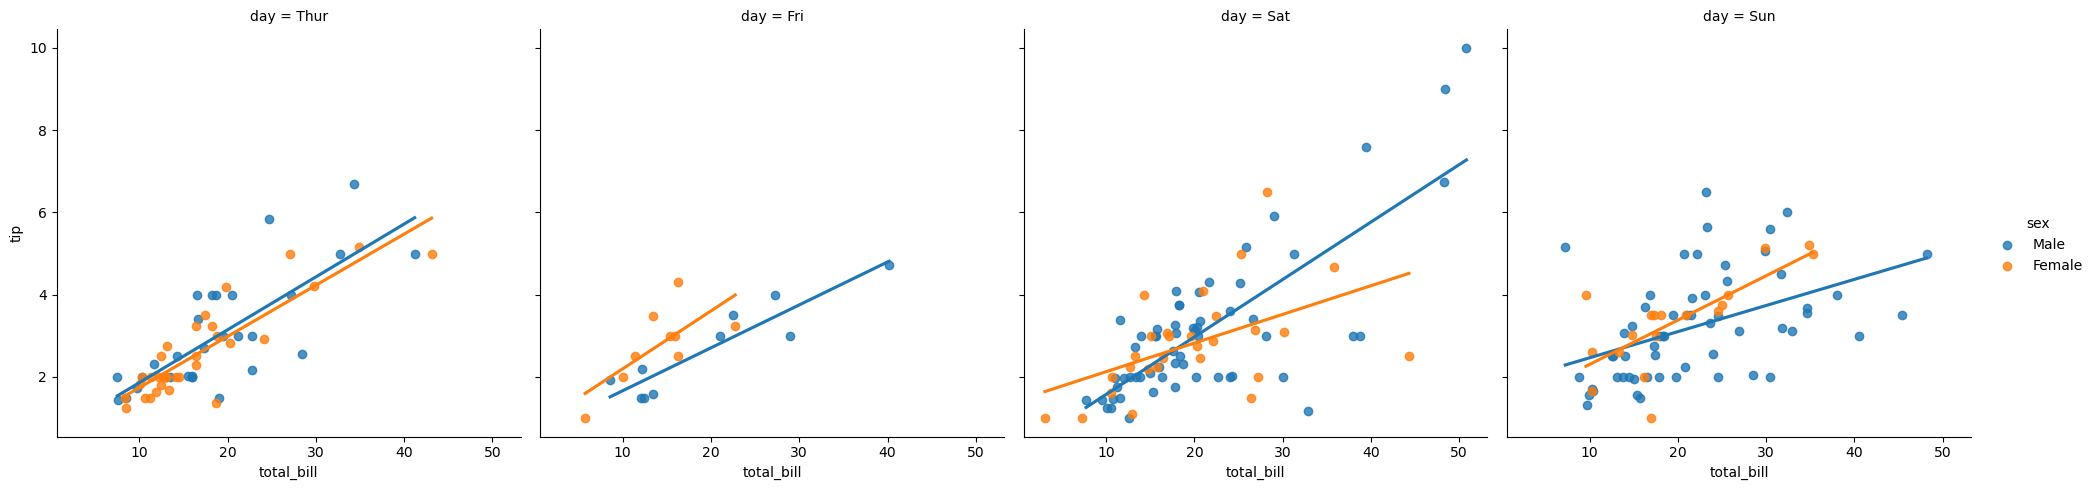

In [24]:
# extra hue
sns.lmplot(data=tips, x='total_bill', y='tip', col="day", hue="sex", ci=None)
plt.show()

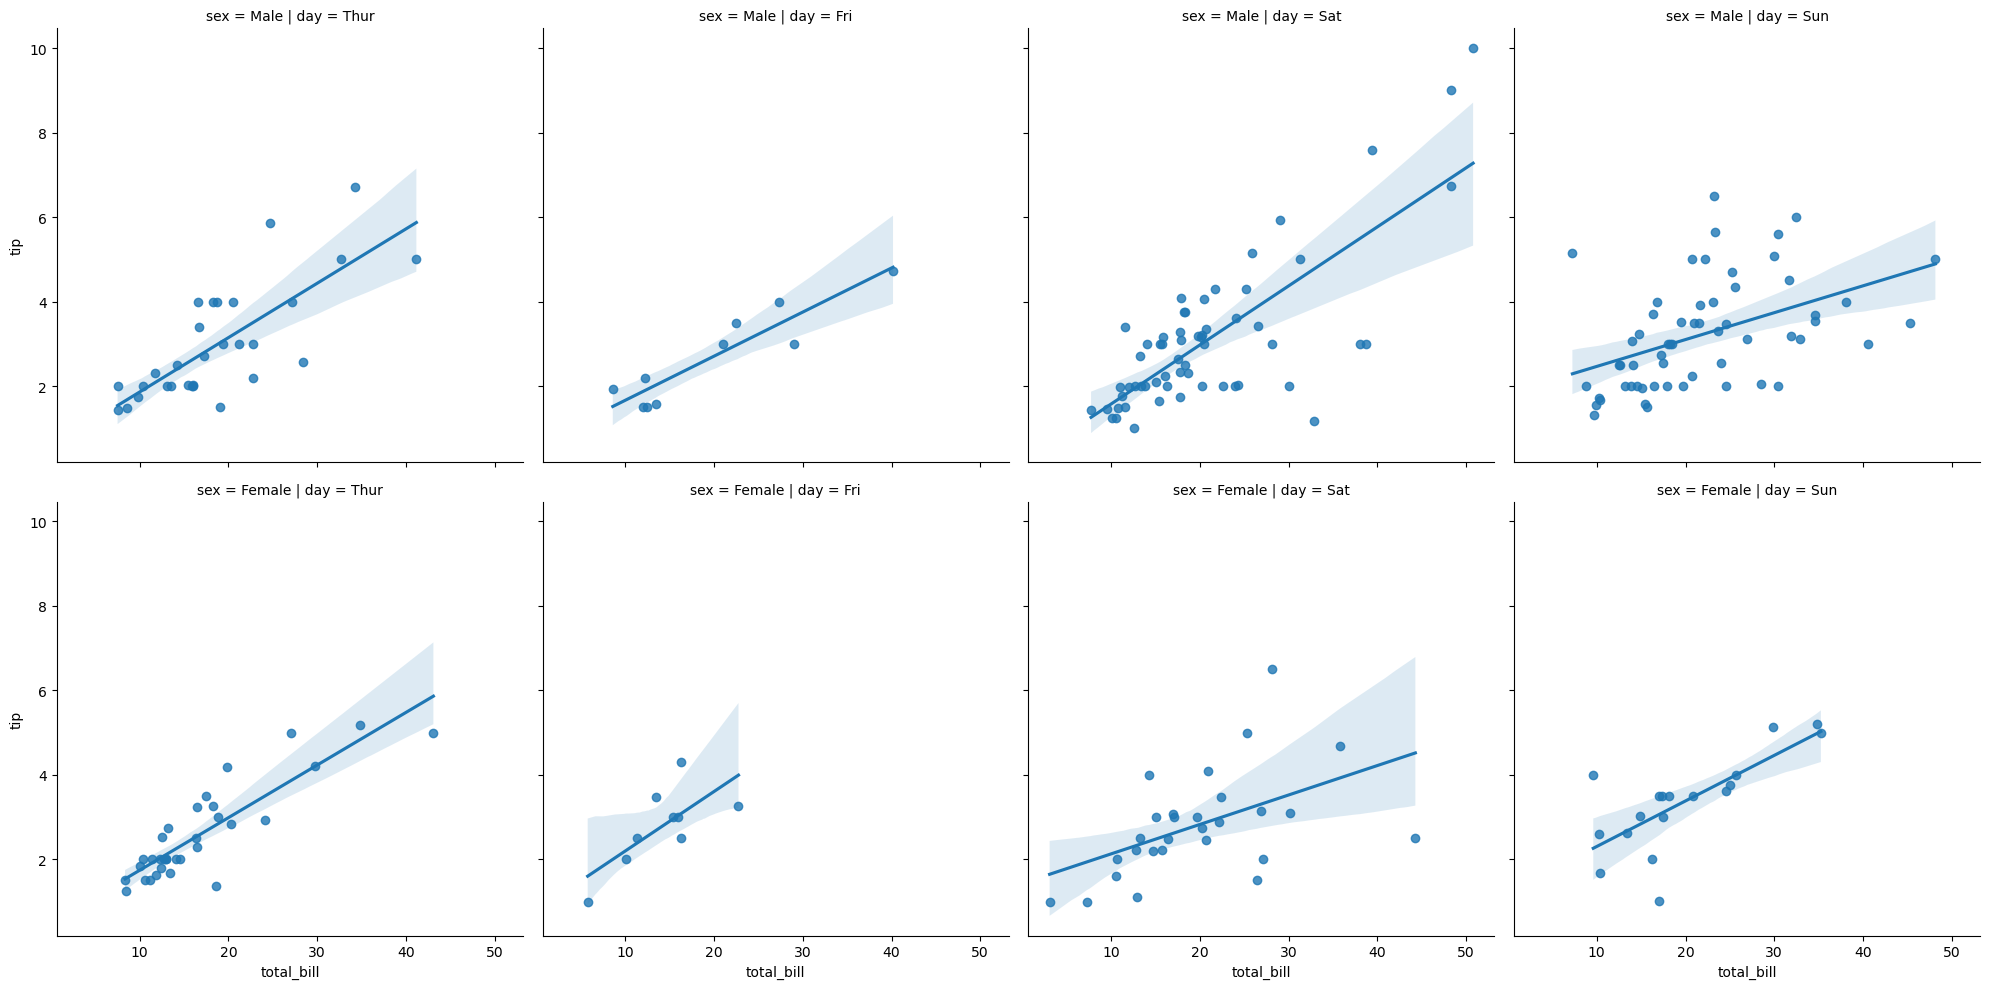

In [25]:
# columns and rows 
sns.lmplot(data=tips, x='total_bill', y='tip', col="day", row="sex")
plt.show()

In [28]:
# scatterplot of every combination
sns.pairplot(tips)
plt.show()